In [21]:
%reset -f

## Assignment E - Brightfield histology color deconvolution
- Author: Catherine Chia and Aoming Sun
- Teacher and TAs: Marten Postma, Aaron Lin, Aoming Sun, Catherine Chia
- Date: 21st June, 2023

### Outline of workflow
1. Prerequisites: 
- Use ImageJ to crop and export images: Stain 1, Stain 2, Background, __OR__ 
- Use ImageJ to export the RGB vectors for the same images

2. Preprocessing

3. Color Deconvolution

4. Separate stains

In [22]:
#Libraries
from matplotlib import pyplot as plt, patches
import numpy as np

#Enable nice output printing features
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
import warnings
warnings.filterwarnings('ignore')

#Add other libraries as you see fit
import glob
from skimage import io

### __Preprocessing steps__

In [23]:
#Start coding here

#Import IHC image and split it to RGB
img_ihc = io.imread('IPQDA_23_ASS_E_DATA/IHC2.tif')
img_ihc_red = img_ihc[:, :, 0]
img_ihc_green = img_ihc[:, :, 1]
img_ihc_blue = img_ihc[:, :, 2]

#Import cropped stain1, stain2 and background ROI images, OR import RGB vectors of the ROIs
img_eosin = io.imread('IPQDA_23_ASS_E_DATA/DAB1.tif')
img_hematoxylin = io.imread('IPQDA_23_ASS_E_DATA/DAB2.tif')
img_background = io.imread('IPQDA_23_ASS_E_DATA/back.tif')

#End coding here

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


array([[[249, 253, 254],
        [248, 252, 253],
        [249, 253, 254],
        ...,
        [251, 251, 251],
        [253, 249, 250],
        [252, 248, 247]],

       [[248, 249, 251],
        [245, 249, 250],
        [246, 247, 251],
        ...,
        [253, 253, 253],
        [255, 253, 254],
        [254, 253, 251]],

       [[247, 246, 251],
        [246, 247, 251],
        [248, 247, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[248, 248, 246],
        [248, 248, 246],
        [249, 249, 249],
        ...,
        [247, 250, 255],
        [244, 247, 254],
        [244, 247, 254]],

       [[251, 251, 251],
        [252, 252, 252],
        [253, 253, 255],
        ...,
        [244, 248, 255],
        [239, 242, 249],
        [239, 242, 249]],

       [[249, 249, 249],
        [251, 251, 251],
        [252, 252, 254],
        ...,
        [238, 242, 253],
        [240, 243, 252],
        [240, 243, 250]]

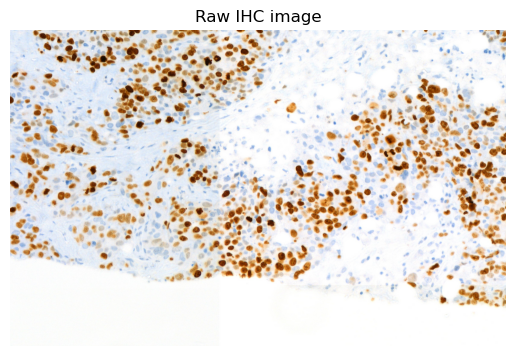

In [24]:
#Inspect imported IHC image
plt.title("Raw IHC image")
plt.axis('off')
plt.imshow(img_ihc)

### Calculate RGB mean of the images

In [25]:
#Start coding here

#Calculate mean of image for each RGB channels. If you use RGB vectors, assign them directly to the variables here
mean_img_stain1 = np.mean(img_eosin, axis=(0, 1))
mean_img_stain2 = np.mean(img_hematoxylin, axis=(0, 1))
mean_img_background = np.mean(img_background, axis=(0, 1))

#End coding here

print(mean_img_stain1)
print(mean_img_stain2)
print(mean_img_background)

[118.8125      53.42361111   6.86805556]
[141.72222222 172.83333333 222.22222222]
[245.65669643 248.92366071 252.27946429]


### Inspect ROIs of stains and background to ensure correct stain color selection

#763506
#8dacde
#f5f8fc


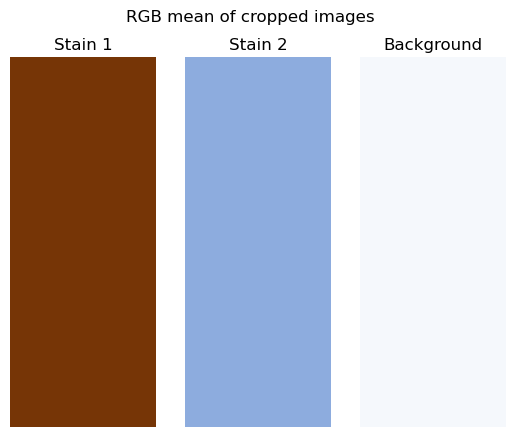

In [26]:
#Convert RGB values to Hex color values for visualization
hex_img_stain1 = '#%02x%02x%02x' % tuple(mean_img_stain1.astype(int))
hex_img_stain2 = '#%02x%02x%02x' % tuple(mean_img_stain2.astype(int))
hex_img_background = '#%02x%02x%02x' % tuple(mean_img_background.astype(int))

print(hex_img_stain1)
print(hex_img_stain2)
print(hex_img_background)

#Visualization of RGB mean of cropped images
fig, axs = plt.subplots(1,3)

fig.suptitle('RGB mean of cropped images')

rectangle_stain1 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain1)
rectangle_stain2 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain2)
rectangle_background = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_background)

axs[0].add_patch(rectangle_stain1)
axs[1].add_patch(rectangle_stain2)
axs[2].add_patch(rectangle_background)
axs[0].set_title('Stain 1')
axs[1].set_title('Stain 2')
axs[2].set_title('Background')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### __Color Deconvolution__

### Calculate transmittance, T and convert it to absorbances, OD according to Beer–Lambert law  

In [27]:
#Calculate transmittances, T for each stain
T_stain1 = mean_img_background / mean_img_stain1
T_stain2 = mean_img_background / mean_img_stain2
OD_stain1 = np.log10(T_stain1)
OD_stain2 = np.log10(T_stain2)

print(OD_stain1)
print(OD_stain2)

[0.31546647 0.66833294 1.5650481 ]
[0.23889065 0.15843867 0.05509441]


### Normalize the absorbances to vector lengths

In [28]:
#Start coding here

# Normalize the absorbances
OD_stain1_norm = OD_stain1 / np.max(OD_stain1)
OD_stain2_norm = OD_stain2 / np.max(OD_stain2)

#End coding here

print(OD_stain1_norm)
print(OD_stain2_norm)

[0.20156983 0.42703668 1.        ]
[1.         0.66322676 0.23062608]


### Form a deconvolution matrix

In [29]:
#Start coding here

#Combine OD_stain1_norm and OD_stain2_norm to form a normalized OD matrix M
M = np.column_stack((OD_stain1_norm, OD_stain2_norm))

#Calculate the deconvolution matrix according to Linear regression
MT = np.linalg.pinv(M)
MT_M = np.dot(MT, M)
inversed_MT_M = np.linalg.inv(MT_M)
D = np.dot(inversed_MT_M, MT)

#End coding here

print("M")
print(M)
print("M transposed")
print(MT)
print("Inversed M transposed multiplied with M")
print(inversed_MT_M)
print("Deconvolution matrix, D")
print(D)

M
[[0.20156983 1.        ]
 [0.42703668 0.66322676]
 [1.         0.23062608]]
M transposed
[[-0.31537896  0.12411315  1.01057001]
 [ 0.82088419  0.38473651 -0.32976208]]
Inversed M transposed multiplied with M
[[ 1.00000000e+00 -2.22044605e-16]
 [ 5.55111512e-17  1.00000000e+00]]
Deconvolution matrix, D
[[-0.31537896  0.12411315  1.01057001]
 [ 0.82088419  0.38473651 -0.32976208]]


### Calculate the coefficient for each stain 

In [30]:
#Convert pixel intensity to transmittance to absorbance according to Beer-Lambert Law on the IHC image
#Calculate the transmittance
T_img_ihc = mean_img_background / img_ihc


#Because of the logarithmic function in the next step, we assign all transmittance value less than 1 to 1 
T_img_ihc[T_img_ihc<1] = 1

In [31]:
#Start coding here

#Calculate the absorbance
OD_img_ihc = np.log(T_img_ihc)

#reshape OD matrix into (#pixels x 3)
OD_reshaped = OD_img_ihc.reshape(-1, 3)

#Coefficient matrix
coeffs = np.dot(OD_reshaped, D.T)

#Extracting the individual coefficients from the coefficient matrix
#Which are essentially the orthogonal representation of the stains of the IHC image
coeff_stain1 = coeffs[:,0]
coeff_stain2 = coeffs[:,1]

# Reshape the coefficients to match the original image dimensions
original_height = img_ihc.shape[0]
original_width = img_ihc.shape[1]
coeff_stain1 = coeff_stain1.reshape(original_height, original_width)
coeff_stain2 = coeff_stain2.reshape(original_height, original_width)

#End coding here

print(coeff_stain1.shape)
print(coeff_stain2.shape)

(2107, 3310)
(2107, 3310)


### __Separate stains__

### Multiply the coefficients with the stain absorbance to get the image absorbance per stain

In [32]:
#Initialize the image absorbance container per stain
OD_img_ihc_stain1 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))
OD_img_ihc_stain2 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))


#Start coding here

#Multiply the coefficients with the stain absorbance per stain. Do it independently for each RGB layer
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

array([[[ 1.45719360e-02,  9.66449784e-03,  3.36066841e-03],
        [ 1.25064879e-02,  8.29463742e-03,  2.88432223e-03],
        [ 2.14000764e-02,  1.41931033e-02,  4.93541564e-03],
        ...,
        [-1.10066588e-02, -7.29991060e-03, -2.53842252e-03],
        [-1.31440860e-02, -8.71750952e-03, -3.03136897e-03],
        [-1.26129799e-02, -8.36526575e-03, -2.90888206e-03]],

       [[ 1.41122453e-02,  9.35961869e-03,  3.25465176e-03],
        [ 1.16702327e-02,  7.74001056e-03,  2.69145996e-03],
        [ 1.95169582e-02,  1.29441689e-02,  4.50111948e-03],
        ...,
        [-1.27076468e-02, -8.42805135e-03, -2.93071470e-03],
        [-1.71284617e-02, -1.13600541e-02, -3.95026989e-03],
        [-1.85238617e-02, -1.22855207e-02, -4.27208551e-03]],

       [[ 1.16702327e-02,  7.74001056e-03,  2.69145996e-03],
        [ 1.53410615e-02,  1.01746024e-02,  3.53804880e-03],
        [ 2.14000764e-02,  1.41931033e-02,  4.93541564e-03],
        ...,
        [-8.72833261e-03, -5.78886372e-03,

### Convert the image absorbance to image transmittance  

In [33]:
#Convert absorbance to transmittance
T_img_ihc_stain1 = 10**(-OD_img_ihc_stain1)
T_img_ihc_stain2 = 10**(-OD_img_ihc_stain2)

array([[[0.96700354, 0.97799245, 0.99229164],
        [0.97161344, 0.98108212, 0.99338061],
        [0.95191884, 0.96784742, 0.98870011],
        ...,
        [1.02566765, 1.01695073, 1.00586205],
        [1.03072803, 1.02027562, 1.0070044 ],
        [1.0294683 , 1.01944844, 1.00672043]],

       [[0.96802763, 0.97867925, 0.9925339 ],
        [0.97348613, 0.98233584, 0.99382185],
        [0.95605536, 0.97063474, 0.98968931],
        ...,
        [1.02969273, 1.01959583, 1.00677104],
        [1.04022781, 1.0265026 , 1.00913733],
        [1.04357547, 1.02869237, 1.00988538]],

       [[0.97348613, 0.98233584, 0.99382185],
        [0.96529251, 0.97684441, 0.99188644],
        [0.95191884, 0.96784742, 0.98870011],
        ...,
        [1.02030105, 1.01341858, 1.00464582],
        [1.03660438, 1.02412976, 1.00832555],
        [1.04268457, 1.02810985, 1.00968648]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

### Clip each layer in the image transmittance to values between 0 and 1, preparing for conversion to values between 0 and 255 later

In [34]:
#Clip each layer to 0,1
T_img_ihc_stain1[T_img_ihc_stain1 > 1] = 1
T_img_ihc_stain2[T_img_ihc_stain2 > 1] = 1
T_img_ihc_stain1[T_img_ihc_stain1 < 0] = 0
T_img_ihc_stain2[T_img_ihc_stain2 < 0] = 0

### Convert the image transmittance to values between 0 and 255 (integers), so that plotting is possible

In [35]:
#Start coding here

T_img_ihc_stain1_norm = (T_img_ihc_stain1 * 255).astype(np.uint8)

T_img_ihc_stain2_norm = (T_img_ihc_stain2 * 255).astype(np.uint8)

#End coding here


array([[[246, 249, 253],
        [247, 250, 253],
        [242, 246, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[246, 249, 253],
        [248, 250, 253],
        [243, 247, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 250, 253],
        [246, 249, 252],
        [242, 246, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### Visualize deconvolved images

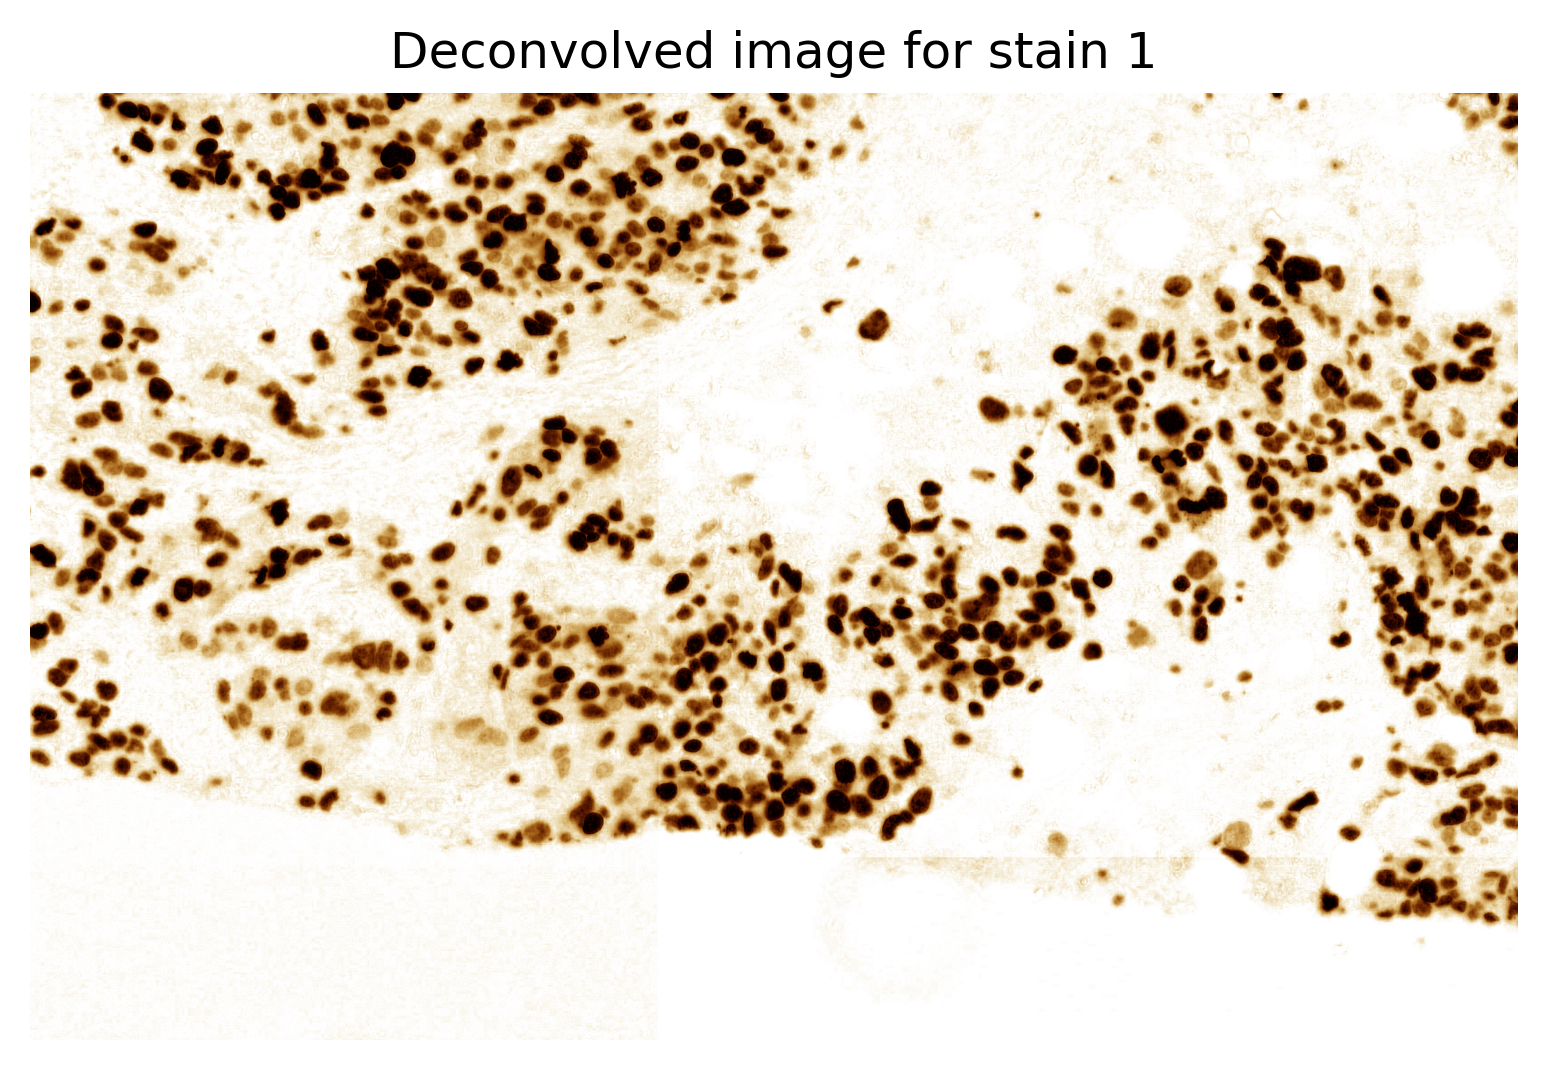

In [36]:
#Display deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 1")
plt.axis('off')
plt.imshow(T_img_ihc_stain1_norm)
fig.savefig('T_img_ihc_stain1_norm.tif')

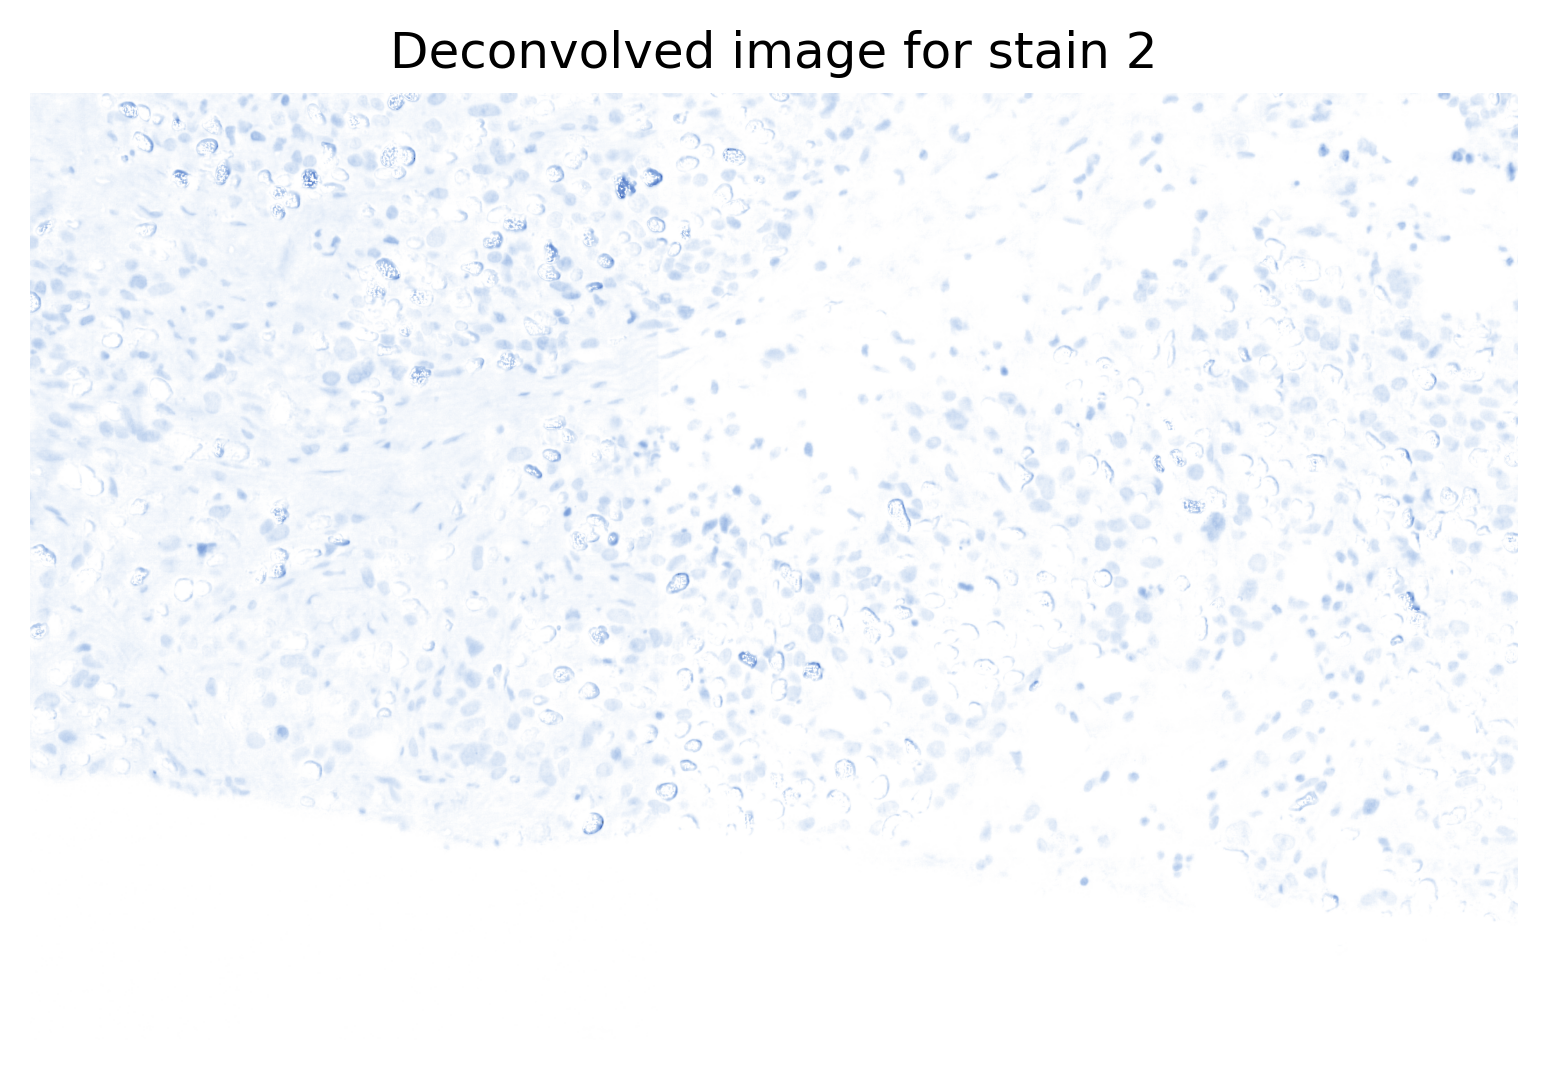

In [37]:
#Display and export deconvolved image for stain 2
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 2")
plt.axis('off')
plt.imshow(T_img_ihc_stain2_norm)
fig.savefig('T_img_ihc_stain2_norm.tif')